In [48]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

print("👋Welcome to the Losant Debug Notebook.")
print("This notebook will verify that we can read inputs and write outputs properly.")

👋Welcome to the Losant Debug Notebook.
This notebook will verify that we can read inputs and write outputs properly.


In [39]:
# Checking for Losant Environment Variables

# Does INPUT_DIR exist? 
if os.getenv("INPUT_DIR") is None:
    raise Exception('❌INPUT_DIR is not a valid environment variable.')

# Does OUTPUT_DIR exist?    
if os.getenv("OUTPUT_DIR") is None:
    raise Exception('❌OUTPUT_DIR is not a valid environment variable.')

# Let's read and print both
input_dir = os.path.join(os.environ['INPUT_DIR'])
output_dir = os.path.join(os.environ['OUTPUT_DIR'])

print("Here is the input directory " + input_dir)
print("Here is the output directory " + output_dir)

print("✅ If you see directories above, Losant Environment Variables look good")

Here is the input directory /Users/taronfoxworth/src/losant/losant-notebook-examples/debug-notebook
Here is the output directory /Users/taronfoxworth/src/losant/losant-notebook-examples/debug-notebook
✅ If you see directories above, Losant Environment Variables look good


In [40]:
# list_files will list all the files in a directory
def list_files(directory):
    for root, dirs, files in os.walk(directory):
        level = root.replace(directory, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print('{}{}'.format(subindent, f))   

In [41]:
# Let's list the input files
list_files(input_dir)
print("❓ Do the inputs above look correct?")

debug-notebook/
    Debug.ipynb
    chart.png
    .ipynb_checkpoints/
        Debug-checkpoint.ipynb
❓ Do the inputs above look correct?


In [42]:
# Let's list the output files
list_files(output_dir)
print("❓ Do the outputs above look correct?")

debug-notebook/
    Debug.ipynb
    chart.png
    .ipynb_checkpoints/
        Debug-checkpoint.ipynb
❓ Do the outputs above look correct?


In [43]:
# Let's write an output file to make sure that works.

# Let's generate some random data
periods = 7 * 24 * 60
tidx = pd.date_range('2016-07-01', periods=periods, freq='T')
np.random.seed([3,1415])
data = np.random.randn(periods)
ts = pd.Series(data=data, index=tidx, name='HelloTimeSeries')
ts.describe()

print("ℹ️ Above is just information about the random data.")

ℹ️ Above is just information about the random data.


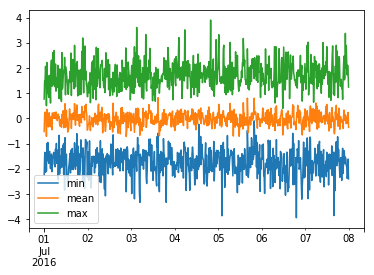

In [44]:
# Let's create and save a chart
chart = ts.resample('15T').agg(['min', 'mean', 'max']).plot()
fig = chart.get_figure()

output_path = os.path.join(output_dir, 'chart.png')
fig.savefig(output_path)

In [46]:
# Let's check if that chart.png was created and exists in the output directory
list_files(output_dir)
my_file = Path(os.path.join(output_dir, 'chart.png'))

if not my_file.exists():
    raise Exception("❌ Looks like the chart didn't properly save.")
    
print("✅ Looks like we can create files and write to output.")

debug-notebook/
    Debug.ipynb
    chart.png
    .ipynb_checkpoints/
        Debug-checkpoint.ipynb
✅ Looks like we can create files and write to output.


In [52]:
print("ℹ️ If you're still having problems with inputs or outpus, post a message in the Losant Forums")
print("https://forums.losant.com")

ℹ️ If you're still having problems with inputs or outpus, post a message in the Losant Forums
https://forums.losant.com


In [51]:
print("ℹ️ If you think you have an issue in your code, we can't help much there. Try these resources: ")
print("Stack Overflow: https://stackoverflow.com")
print("Notebook Resources: https://docs.losant.com/notebooks/notebook-file/resources/")

ℹ️ If you think you have an issue in your code, we can't help much there. Try these resources: 
Stack Overflow: https://stackoverflow.com
Notebook Resources: https://docs.losant.com/notebooks/notebook-file/resources/
